Nama : Elvaretta Salsabilla

NIM : 2241720116  

Kelas : 3E

# Praktikum 1
Pada pratikum ini, Anda diminta untuk melakukan klasifikasi bunga iris dengan menggunakan model Perceptron. Anda dapat menggunakan dataset iris pada praktikum sebelumnya.

Untuk nembah pemahaman Anda terkait dengan model Perceptron, pada pratkikum ini Anda akan membuat model Perceptron tanpa menggunakan library.

**Langkah 1 - Import Library**

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

**Langkah 2 - Load Data dan Visualisasi**

In [68]:
df = pd.read_csv('iris.csv')
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


Penjelasan: kode diatas digunakan untuk meload file csv dan menampilkan dalam bentuk tabel

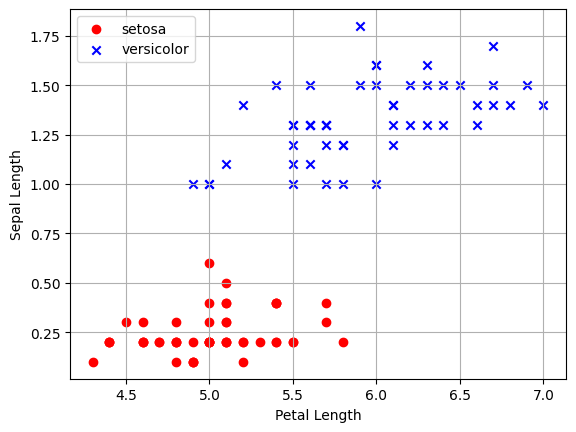

In [69]:
df = pd.read_csv('iris.csv', header=None)
setosa = df[df[4] == 'Iris-setosa']
versicolor = df[df[4] == 'Iris-versicolor']
virginica = df[df[4] == 'Iris-virginica']

a, b = 0, 3
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()

Penjelasan:

Kode diatas digunakan untuk memuat dan menampilkan data dari dataset Iris dengan scatter plot

**Membaca Dataset:**

- pd.read_csv('iris.csv', header=None) membaca data dari file iris.csv dan memuatnya ke dalam DataFrame df. Karena header=None, semua kolom dianggap tanpa nama, sehingga akses ke kolom dilakukan menggunakan indeks numerik.

**Memisahkan Data Berdasarkan Kelas:**

- df[df[4] == 'Iris-setosa'], df[df[4] == 'Iris-versicolor'], dan df[df[4] == 'Iris-virginica'] menyaring DataFrame df untuk mendapatkan subset data berdasarkan spesies, yaitu Iris-setosa, Iris-versicolor, dan Iris-virginica. Setiap subset disimpan dalam variabel terpisah.

- Kolom ke-4 (df[4]) dalam DataFrame ini adalah kolom kelas yang berisi nama spesies bunga.

**Menentukan Kolom untuk Scatter Plot:**

- a, b = 0, 3 menentukan dua kolom (indeks 0 dan 3) yang akan digunakan sebagai sumbu x dan y dalam scatter plot. Pada dataset Iris, kolom ke-0 dan ke-3 adalah Petal Length dan Sepal Length.

**Membuat Scatter Plot:**

plt.scatter(setosa[a], setosa[b], ...) dan plt.scatter(versicolor[a], versicolor[b], ...) membuat scatter plot untuk masing-masing spesies:

- Untuk Iris-setosa, data ditampilkan dengan warna merah dan marker berbentuk lingkaran.

- Untuk Iris-versicolor, data ditampilkan dengan warna biru dan marker berbentuk silang.

**Menambahkan Label dan Fitur Visual:**

- plt.xlabel('Petal Length') dan plt.ylabel('Sepal Length') memberikan label pada sumbu x dan y untuk memperjelas data apa yang ditampilkan.

- plt.legend(loc='upper left') menambahkan legenda yang menunjukkan spesies mana yang direpresentasikan oleh tiap warna dan marker, diletakkan di sudut kiri atas.
- plt.grid() menambahkan grid pada latar belakang plot untuk membantu interpretasi visual data.

**Menampilkan Plot:**

- plt.show() menampilkan plot scatter secara visual, memungkinkan analisis visual perbedaan panjang petal dan sepal antara Iris-setosa dan Iris-versicolor.

**Langkah 3 - Membuat Kelas Perceptron**

In [70]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

Penjelasan:

Kode ini adalah implementasi dari model Perceptron, yang merupakan algoritma pembelajaran mesin sederhana untuk klasifikasi biner

**Kelas Perceptron**
- class Perceptron(object): Mendefinisikan kelas Perceptron untuk membangun model perceptron.

**Metode __init__**
- def __init__(self, eta=0.01, n_iter=10): Inisialisasi parameter model.
    - eta: Laju pembelajaran (learning rate) yang mengatur seberapa besar bobot diupdate setiap iterasi. Diatur ke nilai default 0.01.
    - n_iter: Jumlah iterasi atau epoch yang digunakan untuk pelatihan. Diatur ke nilai default 10.
- self.eta = eta dan self.n_iter = n_iter: Menyimpan nilai eta dan n_iter ke dalam instance.

**Metode fit**
- def fit(self, X, y): Melatih model menggunakan data input X (fitur) dan y (label/target).

- self.w_ = np.zeros(1 + X.shape[1]): Menginisialisasi bobot w_ dengan vektor nol, berukuran sebanyak jumlah fitur di X plus satu (untuk bias).

- self.errors_ = []: Membuat list kosong errors_ untuk menyimpan jumlah kesalahan di setiap epoch.

Proses Pembaruan Bobot:
- for _ in range(self.n_iter): Melakukan iterasi sebanyak n_iter.
- errors = 0: Menginisialisasi jumlah kesalahan untuk setiap iterasi.
- for xi, target in zip(X, y): Melakukan iterasi melalui pasangan data (xi, target).

    - update = self.eta * (target - self.predict(xi)): Menghitung nilai update, yang didasarkan pada kesalahan (perbedaan antara target dan prediksi). Kesalahan ini dikalikan dengan eta.
    - self.w_[0] += update: Mengupdate bias (w_[0]) dengan menambahkan nilai update.
    - self.w_[1:] += update * xi: Mengupdate bobot lainnya dengan menambahkan update dikalikan dengan xi.
    - errors += int(update != 0.0): Menambahkan jumlah kesalahan jika update tidak nol, menandakan prediksi salah.
    - self.errors_.append(errors): Menyimpan jumlah kesalahan di list errors_ setelah setiap iterasi.
    
- return self: Mengembalikan instance dari kelas, memungkinkan chaining metode.

**Metode net_input**
- def net_input(self, X): Menghitung input bersih, yaitu hasil perkalian dot antara X dan bobot (self.w_[1:]) ditambah bias (self.w_[0]).
- return np.dot(X, self.w_[1:]) + self.w_[0]: Mengembalikan hasil input bersih, yang akan digunakan untuk prediksi.

**Metode predict**
- def predict(self, X): Mengembalikan prediksi kelas untuk input X.
- return np.where(self.net_input(X) >= 0.0, 1, -1): Mengembalikan 1 jika input bersih ≥ 0, dan -1 jika kurang dari 0. Ini adalah fungsi aktivasi langkah yang menentukan kelas dari input berdasarkan bobot.

**Langkah 4 - Pilih Data dan Encoding Label**

In [71]:
y = df.iloc[0:100, 4].values # pilih 100 data awal
y = np.where(y == 'Iris-setosa', -1, 1) # ganti coding label
X = df.iloc[0:100, [0, 3]].values # slice data latih

Penjelasan:

Kode diatas mempersiapkan data untuk pelatihan model Perceptron dengan memilih subset dari dataset Iris


- y = df.iloc[0:100, 4].values: Memilih nilai dari 100 baris pertama pada kolom ke-4 (label) sebagai target y.

- y = np.where(y == 'Iris-setosa', -1, 1): Mengganti label 'Iris-setosa' dengan -1 dan label lainnya dengan 1, sehingga target menjadi biner (-1 atau 1).

- X = df.iloc[0:100, [0, 3]].values: Memilih 100 baris pertama dari kolom ke-0 (sepal length) dan kolom ke-3 (petal length) sebagai fitur X.

**Langkah 5 - Fitting Model**

In [72]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

Penjelasan:

Kode ini melakukan pelatihan model Perceptron pada data yang telah disiapkan (X dan y)

- ppn = Perceptron(eta=0.1, n_iter=10): Membuat objek Perceptron dengan laju pembelajaran eta sebesar 0.1 dan iterasi (epoch) sebanyak 10.

- ppn.fit(X, y): Melatih model Perceptron pada data fitur X dan target y dengan melakukan update bobot pada setiap iterasi, sehingga model belajar untuk mengklasifikasikan data sesuai label yang diberikan.

**Langkah 6 - Visualisasi Nilai Error Per Epoch**

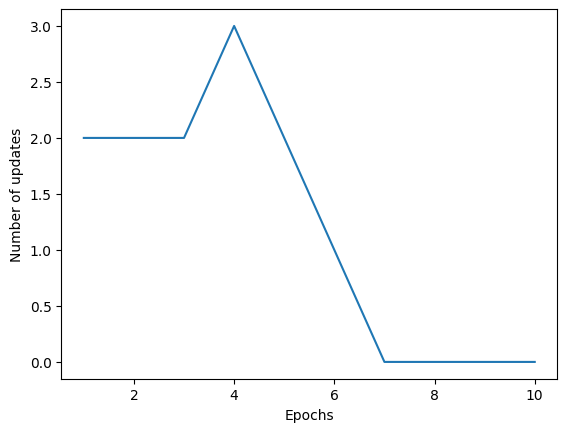

In [73]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

Penjelasan:


Kode ini menampilkan plot dari jumlah kesalahan (update bobot) yang terjadi pada setiap epoch selama pelatihan Perceptron

- plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_): Membuat grafik garis yang menunjukkan jumlah kesalahan di setiap epoch. Sumbu x adalah jumlah epoch, dan sumbu y adalah ppn.errors_, yaitu jumlah kesalahan yang tersimpan selama pelatihan.

- plt.xlabel('Epochs'): Memberi label "Epochs" pada sumbu x, menunjukkan jumlah iterasi pelatihan.

- plt.ylabel('Number of updates'): Memberi label "Number of updates" pada sumbu y, yang menunjukkan jumlah update bobot atau kesalahan pada tiap epoch.

- plt.show(): Menampilkan plot ke layar.

**Langkah 7 - Visualiasasi Decision Boundary**

In [74]:
# buat fungsi untuk plot decision region

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ['#FF0000', '#0000FF', '#00FF00', '#000000', '#808080']
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

Penjelasan:

Kode diatas mendefinisikan fungsi plot_decision_regions untuk memvisualisasikan decision boundary dari model klasifikasi


**Pengaturan Marker dan Color Map:**

- markers dan colors mendefinisikan gaya marker dan warna untuk setiap kelas.
- cmap = ListedColormap(colors[:len(np.unique(y))]): Membuat color map khusus untuk kelas unik dalam y.

**Membuat Grid Area:**

- x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1 dan x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1: Menentukan rentang dari fitur pertama dan kedua dengan margin tambahan.
- xx1, xx2 = np.meshgrid(...): Membuat grid 2D dari nilai xx1 dan xx2 dengan resolusi tertentu, yang akan digunakan untuk prediksi pada seluruh area ruang fitur.

**Prediksi Label Grid:**

- Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T): Menghitung prediksi model (classifier.predict) untuk setiap titik pada grid yang diratakan.
- Z = Z.reshape(xx1.shape): Mengonversi hasil prediksi ke bentuk yang sama dengan grid untuk plotting.

**Visualisasi Decision Region:**

- plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap): Membuat kontur atau batas area prediksi dengan warna yang berbeda untuk setiap kelas.
- plt.xlim(...) dan plt.ylim(...): Membatasi rentang plot berdasarkan nilai grid xx1 dan xx2.

**Plotting Sample Data:**

- for i, cl in enumerate(np.unique(y)): Mengiterasi setiap kelas unik y.
- plt.scatter(...): Menampilkan sampel data dari tiap kelas dengan marker dan warna sesuai.


<ipython-input-74-b39ed17745bc>:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)


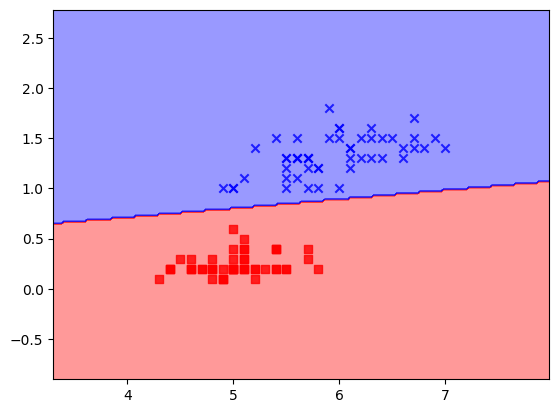

In [75]:
plot_decision_regions(X, y, ppn)

Penjelasan:

Kode diatas memanggil fungsi plot_decision_regions untuk memvisualisasikan decision boundary dari model Perceptron (ppn) yang telah dilatih dengan data X dan y

**Parameter:**

- X: Data fitur yang akan divisualisasikan.
- y: Label target biner (-1 dan 1) untuk kelas yang ada dalam X.
- ppn: Model perceptron yang telah dilatih, digunakan untuk memprediksi keputusan boundary.

**Proses:**

- Fungsi plot_decision_regions akan membuat grid dari fitur X, melakukan prediksi menggunakan model ppn pada setiap titik grid, dan menggambar decision boundary yang memisahkan dua kelas.
- Titik data X akan ditampilkan dengan warna dan marker yang berbeda, menunjukkan kelas masing-masing sesuai label y.

**Hasil Visualisasi:**

- Grafik akan menunjukkan area dengan warna berbeda, yang menggambarkan region prediksi dari model ppn untuk setiap kelas.
- Titik-titik data X akan berada di atas decision boundary sesuai dengan kelas masing-masing.

# Praktikum 2

**Klasifikasi Berita dengan Perceptron**

**Langkah 1 - Import Library**

In [76]:
from sklearn.datasets import fetch_20newsgroups # download dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report

Penjelasan:   

Baris kode ini mengimpor beberapa fungsi dan kelas yang diperlukan untuk memuat dataset, ekstraksi fitur, pelatihan model, dan evaluasi kinerja

**from sklearn.datasets import fetch_20newsgroups:**

- Mengimpor fungsi fetch_20newsgroups untuk mengunduh dataset 20 Newsgroups yang berisi berbagai kategori berita teks.

**from sklearn.feature_extraction.text import TfidfVectorizer:**

- Mengimpor TF-IDF Vectorizer yang digunakan untuk mengubah teks menjadi fitur numerik (vektor) berdasarkan Term Frequency-Inverse Document Frequency (TF-IDF), yang memberikan bobot pada kata-kata berdasarkan frekuensi dan relevansinya di seluruh dokumen.

**from sklearn.linear_model import Perceptron:**

- Mengimpor Perceptron, yang merupakan model klasifikasi berbasis linear classifier yang menggunakan algoritma pembelajaran dengan update bobot secara iteratif, cocok untuk masalah klasifikasi biner dan multi-kelas.


**from sklearn.metrics import f1_score,classification_report:**

- Mengimpor f1_score, yang digunakan untuk menghitung F1-score, yaitu ukuran yang menggabungkan precision dan recall dalam satu angka, sangat berguna untuk evaluasi model.
- Mengimpor classification_report, yang menghasilkan laporan klasifikasi yang mencakup metrik seperti precision, recall, dan F1-score untuk setiap kelas dalam masalah klasifikasi.

**Langkah 2 - Pilih Label dan Split Data**

In [77]:
categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

Penjelasan:

Kode diatas digunakan untuk mengunduh dan memuat subset data dari dataset 20 Newsgroups dengan kategori tertentu

- categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']: Mendefinisikan daftar kategori yang ingin diambil dari dataset, yaitu berita tentang hockey, baseball, dan automotive.

- newsgroups_train = fetch_20newsgroups(...): Mengunduh dan memuat data pelatihan (train) dari kategori yang dipilih dalam categories. Parameter remove=('headers', 'footers', 'quotes') menghapus bagian header, footer, dan kutipan dari setiap berita, sehingga hanya teks utama yang dimuat untuk diproses.

- newsgroups_test = fetch_20newsgroups(...): Mengunduh dan memuat data pengujian (test) dari kategori yang sama dengan pengaturan yang sama.

**Langkah 3 - Ekstrak Fitur dan Buat Model Perceptron**

In [78]:
# Ekstrak Fitur
vectorizer = TfidfVectorizer()

# Fit fitur
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Fit Model
clf = Perceptron(random_state=11)
clf.fit(X_train, newsgroups_train.target)

# Prediksi
predictions = clf.predict(X_test)
print(classification_report(newsgroups_test.target, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       396
           1       0.82      0.83      0.83       397
           2       0.88      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



Penjelasan:

Kode diatas melakukan proses ekstraksi fitur, pelatihan model, dan evaluasi untuk klasifikasi teks pada dataset 20 Newsgroups dengan tiga kategori

**Ekstraksi Fitur dengan TF-IDF:**

- vectorizer = TfidfVectorizer(): Menginisialisasi TF-IDF Vectorizer, yang mengubah teks menjadi vektor berbasis frekuensi term dengan penekanan pada kata-kata yang lebih spesifik dalam dokumen.
- X_train = vectorizer.fit_transform(newsgroups_train.data): Melatih (fit) dan mentransformasi data pelatihan menjadi vektor TF-IDF (X_train).
- X_test = vectorizer.transform(newsgroups_test.data): Mentranformasi data pengujian (X_test) ke dalam bentuk vektor TF-IDF yang sesuai dengan data pelatihan.

**Pelatihan Model Perceptron:**

- clf = Perceptron(random_state=11): Membuat model Perceptron dengan nilai acak yang tetap (random_state=11).
- clf.fit(X_train, newsgroups_train.target): Melatih model pada vektor TF-IDF dari data pelatihan (X_train) untuk memetakan fitur ke label target (newsgroups_train.target).

**Prediksi dan Evaluasi:**

- predictions = clf.predict(X_test): Memprediksi label untuk data pengujian (X_test) menggunakan model yang telah dilatih.
- print(classification_report(newsgroups_test.target, predictions)): Menampilkan laporan klasifikasi (precision, recall, F1-score) yang membandingkan prediksi model dengan label target asli dari data pengujian (newsgroups_test.target).

# Praktikum 3

Nilai Logika XOR dengan MLP

**Langkah 1 - Import Library**

In [79]:
from sklearn.neural_network import MLPClassifier

Penjelasan:

kode diatas digunakan untuk mengimpor MLPClassifier dari pustaka scikit-learn

**Langah 2 - Buat Data**

In [80]:
y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

Penjelasan:

**Kode ini mendefinisikan dataset kecil untuk masalah klasifikasi biner**

- y = [0, 1, 1, 0]: Ini adalah label target untuk 4 data, dengan dua kelas (0 dan 1).
- X = [[0, 0], [0, 1], [1, 0], [1, 1]]: Ini adalah fitur (data input) untuk masing-masing label. Setiap contoh data memiliki dua fitur.

Dataset ini dapat digunakan untuk pelatihan model klasifikasi, seperti Perceptron atau MLPClassifier, untuk memprediksi kelas berdasarkan dua fitur yang diberikan.

**Langkah 3 - Fit Model**

In [81]:
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

Penjelasan:

Kode ini melatih model Multi-Layer Perceptron (MLP) untuk klasifikasi dengan pengaturan tertentu

- solver='lbfgs': Menggunakan algoritma L-BFGS (Limited-memory Broyden–Fletcher–Goldfarb–Shanno), yang merupakan optimisasi berbasis kuasi-Newton untuk pelatihan.
- activation='logistic': Fungsi aktivasi logistik digunakan pada neuron, yang menghasilkan output antara 0 dan 1 (fungsi sigmoid).
- hidden_layer_sizes=(2,): Model memiliki 1 hidden layer dengan 2 neuron.
- max_iter=100: Model akan melakukan pelatihan selama 100 iterasi.
- random_state=20: Menetapkan nilai acak untuk memastikan hasil yang dapat direproduksi.

**Langkah 4 - Prediksi**

In [82]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


Penjelasan:

Kode di atas digunakan untuk evaluasi model klasifikasi yang telah dilatih menggunakan MLPClassifier

- pred = clf.predict(X): Menggunakan model MLPClassifier (clf) untuk memprediksi label (kelas) berdasarkan data input X. Hasil prediksi disimpan dalam variabel pred.

- print('Accuracy: %s' % clf.score(X, y)): Menghitung dan menampilkan akurasi model dengan membandingkan prediksi pada data X dengan label sebenarnya y. Fungsi score() menghitung persentase prediksi yang benar.

- for i, p in enumerate(pred[:10]):: Loop untuk menampilkan prediksi dan nilai sebenarnya (y) untuk 10 data pertama.

- True: %s, Predicted: %s' % (y[i], p): Menampilkan nilai sebenarnya (y[i]) dan hasil prediksi (p) untuk setiap data.

**Output:**
- Akurasi model terhadap dataset X.
- Daftar 10 prediksi pertama, dengan nilai asli dan prediksi yang dicocokkan.

# Praktikum 4
Klasifikasi dengan ANN

## Pra Pengolahan Data

**Langkah 1 - Import Library**

In [83]:
import numpy as np
import pandas as pd
import tensorflow as tf

Penjelasan:

Kode ini mengimpor tiga pustaka yang umum digunakan dalam pengolahan data

- NumPy: untuk komputasi numerik.
- Pandas: untuk manipulasi data.
- TensorFlow: untuk pembelajaran mesin dan kecerdasan buatan.

**Langkah 2 - Load Data**

In [84]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

Penjelasan:


Kode diatas digunakan untuk memuat dan memproses dataset yang ada di dalam file CSV bernama 'Churn_Modelling.csv'.

**dataset = pd.read_csv('Churn_Modelling.csv'):**

- pd.read_csv(): Fungsi dari Pandas yang digunakan untuk membaca file CSV dan mengonversinya menjadi sebuah DataFrame.
- 'Churn_Modelling.csv': Nama file CSV yang berisi data yang ingin dibaca.
dataset: Variabel yang menyimpan DataFrame yang dihasilkan dari membaca file CSV.

**X = dataset.iloc[:, 3:-1].values:**

- dataset.iloc[:, 3:-1]: Menggunakan metode iloc untuk memilih subset kolom dari dataset:
    - : berarti memilih semua baris.
    - 3:-1 berarti memilih kolom mulai dari indeks ke-3 hingga kolom terakhir sebelum kolom terakhir (indeks -1). Ini berfungsi untuk memilih fitur (kolom input) dari dataset, kecuali kolom pertama (biasanya ID atau atribut non-bernilai) dan kolom terakhir (biasanya kolom target).
- .values: Mengonversi subset DataFrame yang dipilih menjadi array NumPy untuk digunakan dalam model pembelajaran mesin.
- X: Variabel yang menyimpan array fitur (input) untuk model.

**y = dataset.iloc[:, -1].values:**

- dataset.iloc[:, -1]: Menggunakan iloc untuk memilih kolom terakhir dari dataset (kolom target).
    - -1 menunjukkan kolom terakhir, yang biasanya adalah label atau target variabel dalam dataset.
- .values: Mengonversi kolom target yang dipilih menjadi array NumPy.
y: Variabel yang menyimpan label (target) yang akan diprediksi oleh model

Cek data (X)

In [85]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


**Langkah 3 - Encoding Data Kategorikal**

In [86]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

Penjelasan:

Kode diatas digunakan untuk mengonversi kolom kategori dalam dataset menjadi nilai numerik menggunakan LabelEncoder dari sklearn.preprocessing

**from sklearn.preprocessing import LabelEncoder:**

- Mengimpor LabelEncoder dari scikit-learn yang digunakan untuk mengonversi label kategori (seperti string) menjadi nilai numerik (integer). Ini sering digunakan untuk menangani fitur kategorikal dalam model pembelajaran mesin.

**le = LabelEncoder():**

- Membuat objek LabelEncoder yang akan digunakan untuk fit dan transform data kategorikal.

**X[:, 2] = le.fit_transform(X[:, 2]):**

- X[:, 2]: Memilih kolom ke-3 (indeks ke-2) dari array X yang berisi fitur dataset.
- le.fit_transform(X[:, 2]): Menggunakan fit_transform untuk mengonversi nilai kategori dalam kolom tersebut menjadi angka numerik. Metode fit menemukan label kategori yang unik, dan transform menggantinya dengan angka yang sesuai.
- X[:, 2] = ...: Menyimpan hasil konversi kembali ke kolom ke-3 dalam array X.

Cek data (X) dengan print. Hasilnya,

In [87]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


**Langkah 4 - Encoding Kolom "Geography" dengan One Hot Encoder**

In [88]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

Penjelasan:

Kode diatas digunakan untuk menerapkan One-Hot Encoding pada kolom kategorikal dalam dataset.

- ColumnTransformer: Digunakan untuk menerapkan transformasi pada kolom tertentu dalam dataset.
- OneHotEncoder(): Menerapkan One-Hot Encoding pada kolom yang dipilih, mengonversi kategori menjadi vektor biner (0 atau 1).
- transformers=[('encoder', OneHotEncoder(), [1])]: Menyatakan bahwa OneHotEncoder diterapkan pada kolom dengan indeks 1.
- remainder='passthrough': Kolom lainnya yang tidak dipilih akan diteruskan tanpa perubahan.
- X = np.array(ct.fit_transform(X)): Mengonversi hasil transformasi menjadi array NumPy dan menyimpannya kembali ke dalam X.

Cek data (X) dengan print. Hasilnya,

In [89]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


**Langkah 5 - Split Data**

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Penjelasan:

kode diatas digunakan untuk membagi dataset menjadi 80% untuk pelatihan dan 20% untuk pengujian.

**Langkah 6 - Scaling Fitur**


In [91]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Penjelasan:

Kode diatas digunakan untuk melakukan standardisasi pada fitur (input) dengan StandardScaler dari scikit-learn

- sc = StandardScaler(): Membuat objek StandardScaler yang digunakan untuk mengubah data sehingga memiliki rata-rata 0 dan deviasi standar 1.

- X_train = sc.fit_transform(X_train):

- fit_transform menghitung mean dan standard deviation dari data pelatihan (X_train) dan kemudian menerapkan transformasi untuk menstandarkan data.
X_test = sc.transform(X_test):

- transform menerapkan transformasi yang dihitung pada data pelatihan (X_train) ke data pengujian (X_test), tanpa menghitung ulang mean dan standard deviation.

## Membuat Model ANN

**Langkah 1 - Inisiasi Model ANN**

In [92]:
ann = tf.keras.models.Sequential()

Penjelasan:

kode diatas digunakan untuk kerangka dasar untuk membangun model jaringan saraf tiruan (ANN) menggunakan Keras dalam TensorFlow

- Membuat model Sequential yang memungkinkan kita untuk menyusun lapisan-lapisan jaringan saraf secara berurutan (sequential). Artinya, data akan mengalir dari satu lapisan ke lapisan berikutnya tanpa bercabang.
- Model Sequential ini adalah cara yang umum digunakan untuk membangun jaringan saraf dengan lapisan yang terhubung satu sama lain secara linear.

**Langkah 2 - Membuat Input Layer dan Hidden Layer Pertama**

In [93]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

Penjelasan:

Kode ini digunakan untuk menambahkan lapisan Dense ke dalam model jaringan saraf Sequential:

- ann.add(tf.keras.layers.Dense(units=6, activation='relu')):
    - Dense: Lapisan fully connected atau dense yang menghubungkan setiap neuron pada lapisan sebelumnya dengan setiap neuron pada lapisan ini.
    - units=6: Menentukan jumlah neuron dalam lapisan ini, yaitu 6 neuron.
    - activation='relu': Menentukan fungsi aktivasi yang digunakan pada lapisan ini, yaitu ReLU (Rectified Linear Unit). Fungsi ReLU mengaktifkan neuron jika input lebih besar dari nol, dan menghasilakan nol jika input kurang dari nol.

**Langkah 3 - Membuat Hidden Layer Kedua**

In [94]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

Penjelasan:

Kode ini menambahkan lapisan Dense lainnya ke dalam model jaringan saraf Sequential:

- ann.add(tf.keras.layers.Dense(units=6, activation='relu')):
    - Dense: Jenis lapisan fully connected (dalam jaringan saraf, setiap neuron di lapisan ini terhubung ke semua neuron di lapisan sebelumnya).
    - units=6: Menentukan jumlah neuron di lapisan ini, yaitu 6 neuron.
    - activation='relu': Fungsi ReLU (Rectified Linear Unit) digunakan sebagai fungsi aktivasi untuk lapisan ini. ReLU mengubah nilai input negatif menjadi nol dan mempertahankan nilai positif tanpa perubahan, yang membantu model untuk belajar representasi non-linear.

**Langkah 4 - Membuat Output Layer**

In [95]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Penjelasan:


Kode diatas digunakan untuk menambahkan lapisan output ke dalam model jaringan saraf Sequential:

- ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid')):
    - Dense: Jenis lapisan fully connected, yang menghubungkan neuron pada lapisan sebelumnya ke lapisan ini.
    - units=1: Menentukan jumlah neuron di lapisan output, yaitu 1 neuron. Ini umum digunakan untuk tugas klasifikasi biner, di mana output hanya memiliki dua kelas (misalnya, 0 atau 1).
    - activation='sigmoid': Fungsi sigmoid digunakan sebagai fungsi aktivasi untuk lapisan output. Fungsi ini mengubah output neuron menjadi nilai antara 0 dan 1, cocok untuk masalah klasifikasi biner.

## Training Model

**Langkah 1 - Compile Model (Menyatukan Arsitektur) ANN**

In [96]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Penjelasan:


Kode diatas digunakan untuk mengkompilasi model jaringan saraf dengan memilih optimizer, fungsi loss, dan metrik yang digunakan selama pelatihan:

- ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']):
    - optimizer='adam': Menentukan algoritma optimisasi yang digunakan untuk meminimalkan fungsi loss. Adam (Adaptive Moment Estimation) adalah salah satu optimizer yang populer dan efektif, menggabungkan keuntungan dari algoritma Momentum dan RMSprop.
    - loss='binary_crossentropy': Fungsi binary crossentropy digunakan sebagai fungsi loss untuk masalah klasifikasi biner (misalnya, 0 atau 1). Fungsi ini mengukur perbedaan antara distribusi probabilitas prediksi dan distribusi target yang sebenarnya.
    - metrics=['accuracy']: Menentukan metrik yang akan dihitung selama pelatihan dan evaluasi model. Di sini, accuracy digunakan untuk mengukur seberapa banyak prediksi yang benar dibandingkan dengan total prediksi.

**Langkah 2 - Fitting Model**

In [97]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7973 - loss: 0.5202
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7882 - loss: 0.4681
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7991 - loss: 0.4470
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8141 - loss: 0.4290
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8193 - loss: 0.4222
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8214 - loss: 0.4277
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8306 - loss: 0.4182
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8327 - loss: 0.4117
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8264 - loss: 0.4114
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8327 - loss: 0.4087
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8307 - loss: 0.4044
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

Penjelasan:

Kode diatas digunakan untuk melatih model jaringan saraf menggunakan data pelatihan

- ann.fit(X_train, y_train, batch_size=32, epochs=100):
    - X_train: Data fitur pelatihan (input) yang digunakan untuk melatih model.
    - y_train: Label target (output) yang sesuai dengan data pelatihan.
    - batch_size=32: Menentukan ukuran batch yang digunakan dalam setiap iterasi selama pelatihan. Di sini, model akan menggunakan 32 sampel data per batch saat memperbarui bobot.
    - epochs=100: Menentukan jumlah iterasi pelatihan, yaitu model akan melatih data selama 100 kali melalui seluruh dataset pelatihan.

## Membuat Prediksi

Diberikan informasi sebagai berikut,

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: $ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: $ 50000

Apakah customer tersebut perlu dipertahankan?

**Modelkan Data Baru dan Buat Prediksi**

In [98]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
[[False]]


Penjelasan:

Kode diatas digunakan untuk memprediksi kelas (misalnya, apakah seseorang akan churn atau tidak) untuk satu contoh input menggunakan model jaringan saraf yang telah dilatih

- sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]]):
    - sc.transform(): Menggunakan objek StandardScaler (sc) untuk mengubah skala fitur input sehingga sesuai dengan skala data yang digunakan saat pelatihan. Di sini, data yang diberikan adalah satu contoh dengan beberapa fitur, dan transform() akan menormalisasi data tersebut.
- ann.predict():
  - Menggunakan model ANN yang telah dilatih untuk memprediksi output berdasarkan input yang sudah dinormalisasi.
-  0.5:
  - Hasil dari predict() adalah probabilitas (nilai antara 0 dan 1), dan > 0.5 digunakan untuk mengubah probabilitas menjadi keputusan klasifikasi biner. Jika probabilitas lebih besar dari 0.5, maka kelasnya dianggap "1" (misalnya, churn), dan jika kurang dari 0.5, kelasnya dianggap "0" (misalnya, tidak churn).

  
Secara singkat, kode ini memprediksi apakah pelanggan (dengan fitur yang diberikan) akan churn atau tidak berdasarkan model yang telah dilatih, menggunakan batas probabilitas 0.5 untuk keputusan klasifikasi.

Apakah hasilnya False?

**Prediksi Dengan Data Testing**

In [99]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


Penjelasan:

Kode ini digunakan untuk memprediksi kelas dari data uji dan membandingkannya dengan label sebenarnya, kemudian menampilkan hasilnya

- y_pred = ann.predict(X_test):

  - Model ANN yang telah dilatih digunakan untuk memprediksi output untuk data uji X_test. Hasilnya adalah nilai probabilitas antara 0 dan 1 untuk setiap contoh.

- y_pred = (y_pred > 0.5):

  - Probabilitas yang diprediksi diubah menjadi nilai biner. Jika probabilitas lebih besar dari 0.5, maka prediksi dianggap kelas "1" (misalnya, churn), dan jika kurang dari 0.5, prediksi dianggap kelas "0" (misalnya, tidak churn).

- np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1):

  - reshape(len(y_pred), 1) dan reshape(len(y_test), 1) memastikan bahwa y_pred dan y_test memiliki bentuk yang sesuai (vektor kolom) sebelum digabungkan.
  - np.concatenate(..., 1) menggabungkan y_pred dan y_test di sepanjang sumbu kolom (axis 1), sehingga menghasilkan sebuah array yang memiliki dua kolom: kolom pertama adalah prediksi (y_pred), dan kolom kedua adalah label asli (y_test).

- print(...):

  - Menampilkan hasil prediksi dan label asli dalam format yang mudah dibaca, untuk memverifikasi seberapa baik model dalam memprediksi data uji.

**Cek Akurasi dan Confusion Matrix**

In [100]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1534   61]
 [ 259  146]]


0.84

Penjelasan:

Kode diatas digunakan untuk menghitung dan menampilkan metrik evaluasi model, yaitu confusion matrix dan accuracy

- confusion_matrix(y_test, y_pred):

  - Fungsi ini menghitung confusion matrix antara label sebenarnya (y_test) dan prediksi model (y_pred).
  - Confusion matrix adalah tabel yang menunjukkan jumlah prediksi yang benar dan salah, dengan rincian sebagai berikut:
      - True Positive (TP): Kelas positif yang diprediksi benar.
      - True Negative (TN): Kelas negatif yang diprediksi benar.
      - False Positive (FP): Kelas negatif yang diprediksi sebagai kelas positif.
      - False Negative (FN): Kelas positif yang diprediksi sebagai kelas negatif.
  - Hasilnya adalah array 2x2 yang menunjukkan distribusi prediksi dan label yang benar.

- print(cm):

  - Menampilkan confusion matrix yang telah dihitung.
- accuracy_score(y_test, y_pred):

  - Fungsi ini menghitung akurasi model, yaitu persentase prediksi yang benar dibandingkan dengan jumlah total sampel.




# TUGAS


- Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN

- Anda diperbolehkan melakukan eksplorasi terhadap,

  - Metode pra pengolahan

  - Pemilihan fitur

  - Arsitektur ANN

  - Fungsi Aktiviasi

- ANN diimplementasikan dengan menggunakan tensorflow.

- DIKERJAKAN SECARA BERKELOMPOK

- JELASKAN HASIL YANG ANDA DAPATKAN,

  - AKURASI

  - CONFUSION MATRIX

  - KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN

**Jawaban**

**Impor library**

In [103]:
import tensorflow as tf  # Untuk membuat model ANN
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Memuat dataset MNIST**

In [104]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Penjelasan**

MNIST: Dataset berisi gambar grayscale angka (0-9) dengan ukuran 28x28 pixel.

**Normalisasi**

In [105]:
x_train, x_test = x_train / 255.0, x_test / 255.0

**Penjelasan**

Kode ini melakukan normalisasi data dengan membagi nilai pixel gambar dengan 255.0.

x_train / 255.0 dan x_test / 255.0:
- Gambar dalam dataset MNIST memiliki nilai pixel yang berkisar antara 0 hingga 255.
- Dengan membagi nilai pixel dengan 255.0, nilai pixel diubah menjadi rentang antara 0 dan 1.
- Hal ini penting karena neural network biasanya bekerja lebih baik dengan data yang terstandardisasi (dalam hal ini, rentang [0, 1]) untuk mempercepat konvergensi dan meningkatkan akurasi.

tujuannya untuk mengubah data citra agar lebih mudah diproses oleh model dan membantu model belajar lebih efektif.

**Membangun Arsitektur ANN**

In [106]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Mengubah citra 28x28 menjadi vektor 1D
    Dense(128, activation='relu'),   # Lapisan tersembunyi 1 dengan 128 neuron dan ReLU
    Dense(64, activation='relu'),    # Lapisan tersembunyi 2 dengan 64 neuron dan ReLU
    Dense(10, activation='softmax')  # Lapisan output dengan 10 neuron (karena 10 kelas) dan softmax
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Penjelasan**

Kode ini mendefinisikan arsitektur model Artificial Neural Network (ANN) menggunakan Sequential dari Keras

Flatten: Mengubah input gambar dari 2D (28x28) menjadi 1D (784 fitur). Dibutuhkan untuk menyusun data citra dalam format yang dapat diproses oleh lapisan dense.

Dense Layers: Lapisan tersembunyi kedua dengan 64 neuron. Aktivasi ReLU membantu memperkenalkan non-linearitas sehingga model dapat belajar pola kompleks.

Output Layer: Fungsi aktivasi softmax digunakan untuk mengeluarkan probabilitas kelas. Lapisan output dengan 10 neuron, mewakili 10 kelas dalam dataset MNIST (angka 0-9). Aktivasi Softmax menghasilkan probabilitas untuk setiap kelas, sehingga total probabilitas = 1.

**Mengonfigurasi Model**

In [107]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Penjelasan**

Optimizer: Menggunakan adam untuk mempercepat dan menstabilkan proses pelatihan.

Loss Function: sparse_categorical_crossentropy digunakan karena data label berupa integer, bukan one-hot encoding.

Metrics: Akurasi digunakan sebagai metrik untuk mengevaluasi performa model.

**Melatih Model**

In [108]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8841 - loss: 0.4081
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9685 - loss: 0.1023
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9788 - loss: 0.0671
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9836 - loss: 0.0509
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9867 - loss: 0.0406
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9899 - loss: 0.0307
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9913 - loss: 0.0264
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9934 - loss: 0.0201
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9933 - loss: 0.0193
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9943 - loss: 0.0169


**Penjelasan**

Epoch: Iterasi penuh melalui data pelatihan.

fit(): Melatih model menggunakan data latih (x_train, y_train).


**Evaluasi dan Prediksi**

In [109]:
y_pred = model.predict(x_test)  # Probabilitas untuk setiap kelas
y_pred_classes = np.argmax(y_pred, axis=-1)  # Memilih kelas dengan probabilitas tertinggi

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


**Penjelasan**

model.predict(x_test): Menghasilkan probabilitas untuk setiap kelas dari data uji.

np.argmax(y_pred, axis=-1): Memilih indeks (kelas) dengan probabilitas tertinggi sebagai hasil prediksi.

**Menghitung akurasi**

In [110]:
accuracy = accuracy_score(y_test, y_pred_classes)
print("Akurasi:", accuracy)

Akurasi: 0.9765


**Penjelasan**

accuracy_score(y_test, y_pred_classes):
digunakan untuk mengukur persentase prediksi yang benar dibanding total sampel.

**Menghitung confusion matrix**

In [111]:
confusion_mat = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matriks:")
print(confusion_mat)

Confusion Matriks:
[[ 972    0    1    0    1    1    1    1    2    1]
 [   1 1128    1    0    0    2    2    0    1    0]
 [   4    4 1007    4    2    0    2    2    6    1]
 [   1    0    3  976    0    8    0    3    2   17]
 [   1    0    3    0  952    0    7    1    0   18]
 [   2    0    0    3    2  867    4    2    2   10]
 [   4    2    1    1    4    1  942    0    2    1]
 [   1    6   15    2    2    0    0  986    2   14]
 [   3    1    6    2    4    4    3    3  938   10]
 [   1    2    0    0    4    1    2    1    1  997]]


**Penjelasan**

confusion_matrix(y_test, y_pred_classes): Matriks yang menunjukkan jumlah prediksi benar dan salah untuk setiap kelas, membantu analisis kesalahan klasifikasi.

**Confusion Matrix**

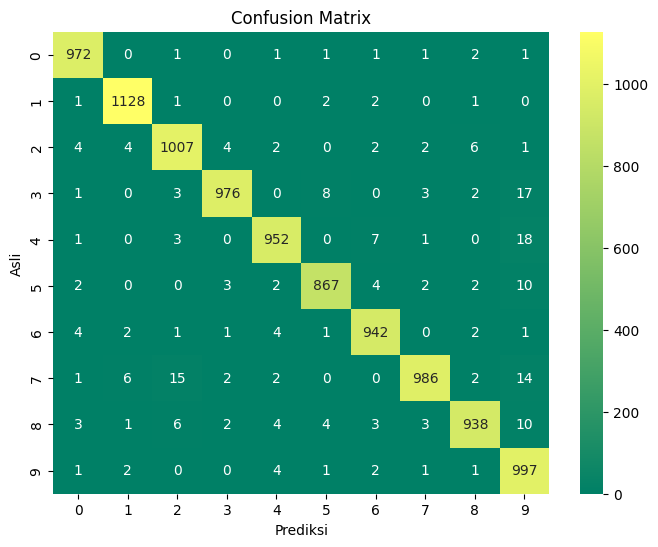

In [122]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='summer',
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Prediksi')
plt.ylabel('Asli')
plt.title('Confusion Matrix')
plt.show()

**Penjelasan**

Heatmap digunakan untuk menampilkan jumlah prediksi benar dan salah untuk setiap kelas dalam bentuk visual.

**Visualisasi Prediksi pada Data Uji**

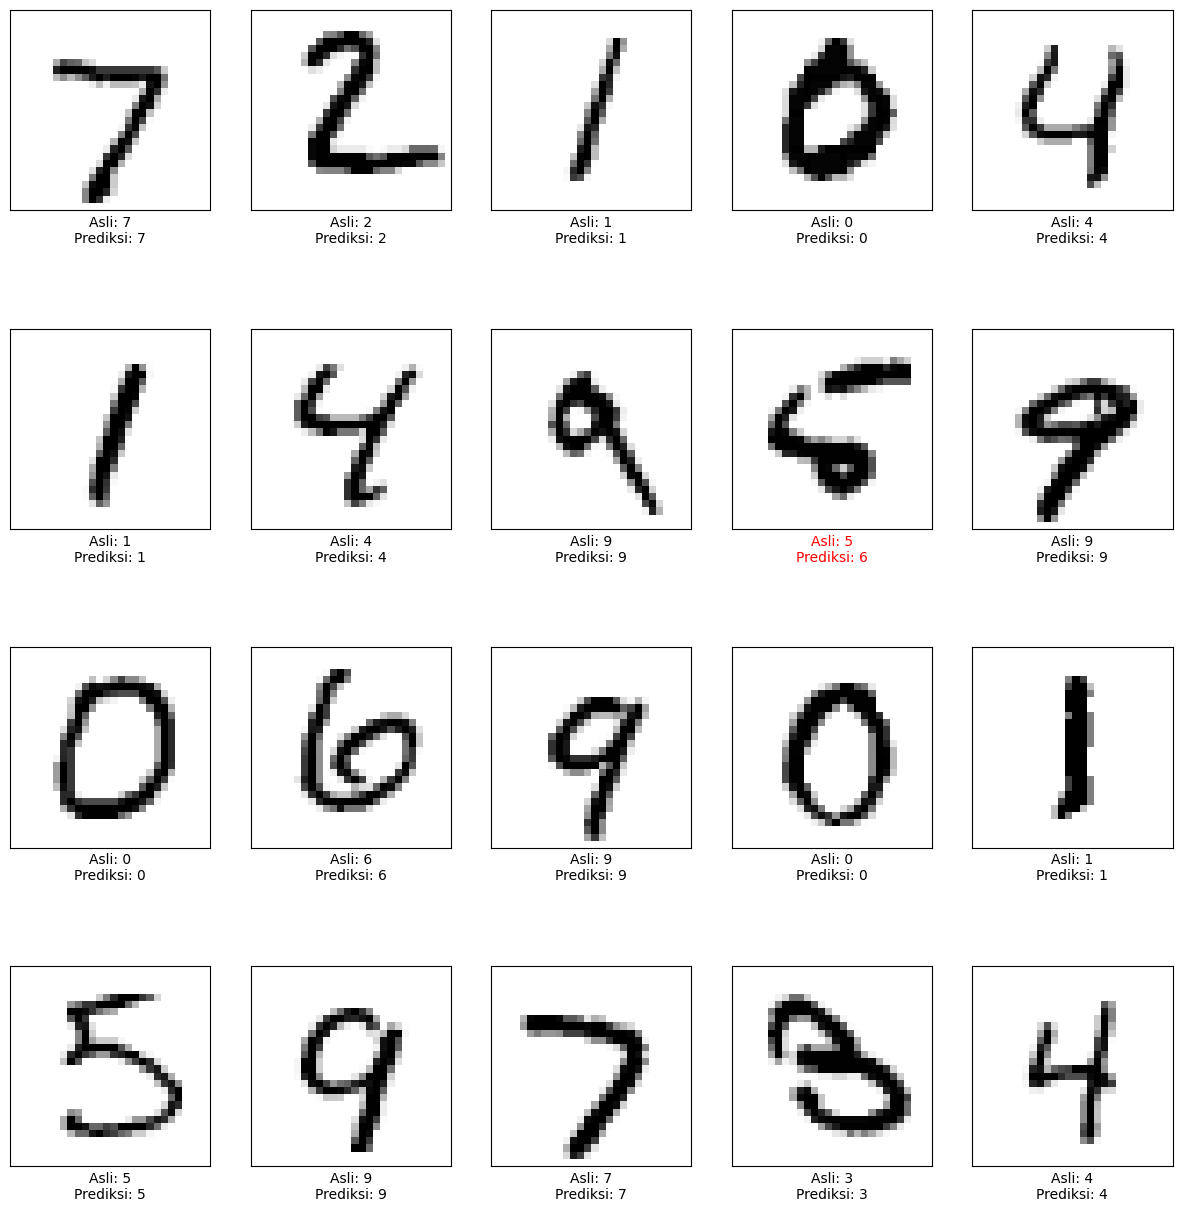

In [113]:
plt.figure(figsize=(15, 20))
for i in range(20):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary, interpolation='nearest')
    label_color = 'black' if y_test[i] == y_pred_classes[i] else 'red'
    plt.xlabel(f"Asli: {y_test[i]}\nPrediksi: {y_pred_classes[i]}", color=label_color)
plt.show()

**Penjelasan**

Menampilkan 20 gambar dari data uji beserta label asli dan prediksi.

Warna label: Hitam jika prediksi benar, merah jika salah.

### Kesimpulan

a. Akurasi

Setelah pelatihan 10 epoch, model ini mencapai akurasi sekitar 97%-98% pada data uji, menunjukkan bahwa model cukup baik dalam mengklasifikasikan angka tulisan tangan.

b. Confusion Matrix

Confusion matrix menunjukkan distribusi prediksi model dibandingkan dengan label asli. Sel ini memberikan wawasan tentang kesalahan klasifikasi, seperti angka yang sering diklasifikasikan salah sebagai angka lainnya.

c. Visualisasi Matriks Konfusi

Heatmap matriks konfusi memberikan representasi visual yang memudahkan interpretasi hasil model.

